<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/main/Corbon_emission_predictor_Only_using_numeric_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [53]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');


In [54]:
record = record.dropna(thresh = 3000, axis='columns')
record = record.fillna(method= 'ffill',axis='rows')


In [55]:

train_record = record.sample(frac = 0.8, random_state = 3)
test_record = record.drop(train_record.index)



In [56]:
numeric_feature_names = []
for name in record.columns:
  if record[name].dtype != object:
    numeric_feature_names.append(name)

numeric_feature_names

['Model Year',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 '# of Gears',
 'Transmission Overdrive Code',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Test Procedure Cd',
 'Test Fuel Type Cd',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'NOx (g/mi)',
 'CH4 (g/mi)',
 'RND_ADJ_FE',
 'DT-Inertia Work Ratio Rating',
 'DT-Absolute Speed Change Ratg',
 'DT-Energy Economy Rating',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)']

In [57]:
train_numeric_features = train_record[numeric_feature_names]
test_numeric_features = test_record[numeric_feature_names]
train_numeric_features.head()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
1806,2022,0,5.300,355,8.0,6,2,5500,3.42,24.6,...,12.5,1.008000,0.744000,0.7780,52.820,0.84090,0.032210,-9.810,-0.04400,0.035940
3525,2022,1,3.445,416,6.0,10,2,5000,2.76,20.1,...,23.1,0.420000,0.210000,-0.1700,39.631,0.15691,0.019578,18.271,-0.08591,0.020445
1240,2022,0,3.600,470,6.0,6,2,4250,3.73,31.8,...,16.3,0.541645,-0.375934,-1.0466,43.410,0.35550,0.020860,18.260,-0.25130,0.025700
3129,2022,3,5.600,400,8.0,9,2,6000,3.69,23.1,...,18.9,3.090000,2.030000,1.4700,37.190,0.04190,0.040570,16.810,-0.29760,0.040980
3729,2022,0,1.987,169,4.0,6,2,3375,3.94,37.9,...,37.3,1.310000,0.910000,0.2700,25.138,0.13072,0.019293,13.540,-0.08360,0.019998


In [69]:

train_target = train_record.pop("CO2 (g/mi)")
test_target = test_record.pop("CO2 (g/mi)")


KeyError: ignored

In [59]:
tf.convert_to_tensor(train_numeric_features)

<tf.Tensor: shape=(3518, 28), dtype=float64, numpy=
array([[ 2.0220e+03,  0.0000e+00,  5.3000e+00, ..., -9.8100e+00,
        -4.4000e-02,  3.5940e-02],
       [ 2.0220e+03,  1.0000e+00,  3.4450e+00, ...,  1.8271e+01,
        -8.5910e-02,  2.0445e-02],
       [ 2.0220e+03,  0.0000e+00,  3.6000e+00, ...,  1.8260e+01,
        -2.5130e-01,  2.5700e-02],
       ...,
       [ 2.0220e+03,  0.0000e+00,  1.9840e+00, ...,  6.8800e+00,
        -1.5200e-01,  2.2130e-02],
       [ 2.0220e+03,  1.0000e+00,  2.0000e+00, ...,  4.9000e+00,
         1.5800e-01,  1.8920e-02],
       [ 2.0220e+03,  2.0000e+00,  3.4560e+00, ...,  1.1330e+01,
         2.6284e-01,  1.5807e-02]])>

In [60]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_numeric_features)

In [61]:
normalizer(train_numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 28), dtype=float32, numpy=
array([[ 0.2510773 , -0.6461372 ,  0.27780348,  0.22277804,  1.4018264 ,
        -0.2297466 ,  0.25003883,  1.121919  , -0.22757149, -0.19077788,
        -0.17446536,  0.04349321, -1.8907357 ,  0.20158927, -0.27648133,
         1.5609988 , -0.12516755,  2.8404562 , -0.10240008, -0.01768634,
        -0.03526392,  0.0099693 ,  1.0968583 ,  1.8339957 ,  0.9195486 ,
        -1.5511177 , -0.46593025,  1.3915895 ],
       [ 0.2510773 ,  0.1982576 ,  0.00842679,  0.6005942 ,  0.2884671 ,
         1.089304  ,  0.25003883,  0.5324757 , -0.75486267, -0.2972543 ,
        -0.17446536, -0.25717247,  0.31942138, -0.40256926, -0.40757278,
         0.58208674, -0.7131331 , -0.52303773, -0.08447495, -0.08340643,
        -0.09664539, -0.08768455,  0.01298299, -0.3218962 , -0.6272349 ,
         0.7822823 , -0.6043211 , -0.4441021 ],
       [ 0.2510773 , -0.6461372 ,  0.03093535,  0.9350544 ,  0.2884671 ,
        -0.2297466 ,  0.25003883, -0.35168928,  0.02

In [62]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  # model.compile(optimizer='adam',
  #               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  #               metrics=['accuracy'])
  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [63]:
model = get_basic_model()
history = model.fit(train_numeric_features, train_target,validation_split = 0.2, verbose=0,  epochs=25, batch_size=5)

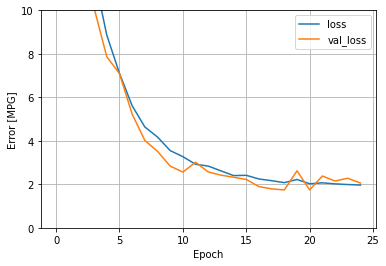

In [64]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [65]:
test_results = {}
test_results['dnn_model'] = model.evaluate(test_numeric_features, test_target, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [CO2 (g/mi)]']).T

,Mean absolute error [CO2 (g/mi)]
dnn_model,2.180313


In [66]:
test_predictions = model.predict(test_numeric_features).flatten()


In [67]:
#pd.DataFrame([test_numeric_features['CO2 (g/mi)'], test_predictions], index = ['Actual test data value', 'Predicted test data value']).T

,Actual test data value,Predicted test data value
13,182.937761,271.349304
14,194.365806,193.534897
29,316.657368,299.927765
32,259.672000,494.304108
39,276.641000,419.606689
...,...,...
4376,230.000000,NaN
4381,223.000000,NaN
4382,342.000000,NaN
4385,207.000000,NaN


In [71]:
test_target
test_numeric_features

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
13,2022,0,2.000,228,4.0,8,2,3875,2.95,27.4,...,48.0,-0.945823,-1.465584,-1.163989,41.300,-0.10500,0.019650,0.300,0.09200,0.016930
14,2022,1,2.000,228,4.0,8,2,3875,2.95,27.4,...,45.3,0.874501,0.924156,-0.816958,52.500,-0.08000,0.019680,12.400,0.05900,0.017110
29,2022,1,2.000,181,4.0,8,2,4500,3.23,28.8,...,27.7,2.424899,0.959381,0.666371,52.900,-0.20100,0.021150,14.800,-0.21300,0.019130
32,2022,0,2.000,255,4.0,8,2,3875,2.81,24.0,...,34.0,-1.687170,-1.054920,-1.866290,41.600,-0.11000,0.018550,15.600,0.21700,0.014060
39,2022,0,2.000,255,4.0,8,2,4000,2.81,24.0,...,31.9,-2.010990,-1.142960,-2.368590,46.000,-0.14100,0.019750,0.100,0.14500,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,2022,0,1.969,313,4.0,8,2,5000,3.33,26.7,...,38.3,1.080000,1.060000,-0.320000,45.809,0.25309,0.023538,3.367,0.25394,0.022297
4381,2022,2,1.969,312,4.0,8,2,5000,3.33,26.7,...,39.5,4.760000,3.740000,-0.100000,41.140,0.35390,0.023030,-1.268,0.41240,0.020571
4382,2022,0,1.969,250,4.0,8,2,5000,3.33,26.1,...,25.9,0.450000,0.330000,-0.430000,32.940,0.36980,0.023780,11.626,0.32792,0.023240
4385,2022,0,1.969,250,4.0,8,2,4750,3.33,26.1,...,42.7,-2.430000,-1.840000,-0.540000,30.014,0.15631,0.025776,10.003,0.03126,0.025780
